# ***Student Performance Analysis PBL Project***

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [7]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Basic Data Operations

In [8]:
df.shape

(1000, 8)

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race/ethnicity               1000 non-null   str  
 2   parental level of education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test preparation course      1000 non-null   str  
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


## Basic Dataset Overview

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Feature Engineering

In [13]:
df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average_score"] = df["total_score"] / 3

## EDA

## Distribution of Scores

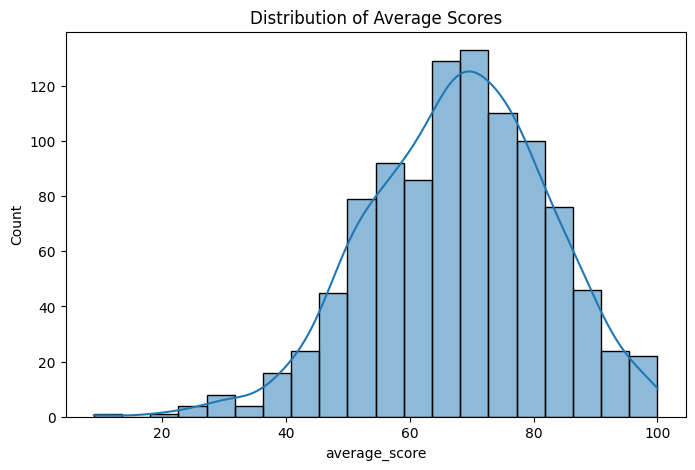

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df["average_score"], bins=20, kde=True)
plt.title("Distribution of Average Scores")
plt.show()

## Interpretation
- Most students score between 60–80
- Distribution slightly left-skewed
- Very few students score below 40

## Gender wise Performance

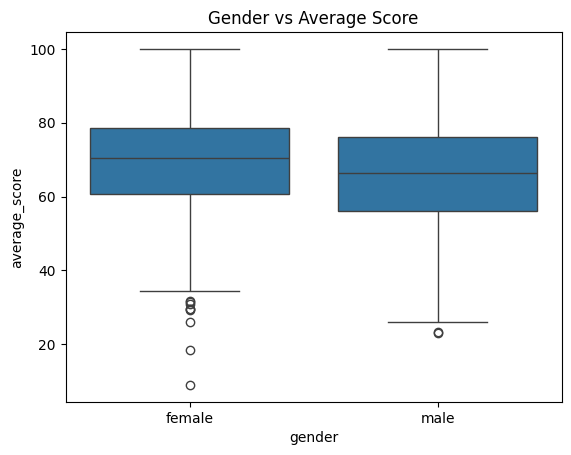

In [18]:
sns.boxplot(x="gender", y="average_score", data=df)
plt.title("Gender vs Average Score")
plt.show()

## Interpretation
- Female students perform better overall in reading and writing.
- Male students slightly better in math.
- Overall difference is small but visible.

## Parental Education Impact

In [19]:
df.groupby("parental level of education")["average_score"].mean().sort_values()

parental level of education
high school           63.096939
some high school      65.108007
some college          68.476401
associate's degree    69.569069
bachelor's degree     71.923729
master's degree       73.598870
Name: average_score, dtype: float64

## Interpretation
- Students whose parents have a master’s or bachelor’s degree score higher.
- Students with parents having only high school education score lower.
- Clear positive relationship between parental education and performance.

## Lunch Type

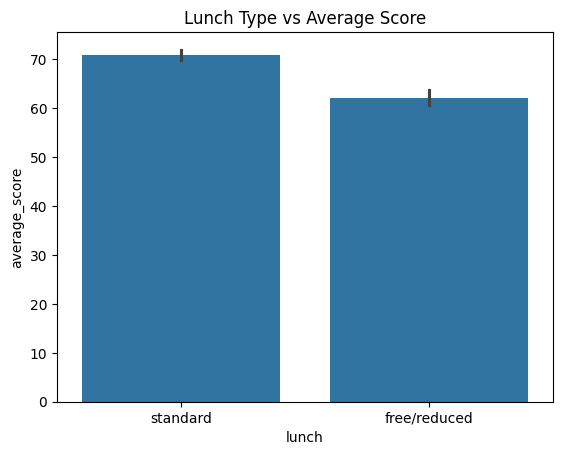

In [20]:
sns.barplot(x="lunch", y="average_score", data=df)
plt.title("Lunch Type vs Average Score")
plt.show()

## Interpretation
- Students with standard lunch perform significantly better.
- Free/reduced lunch students score lower on average.
- Suggests socioeconomic impact on academic performance.

## Test Preparation Course

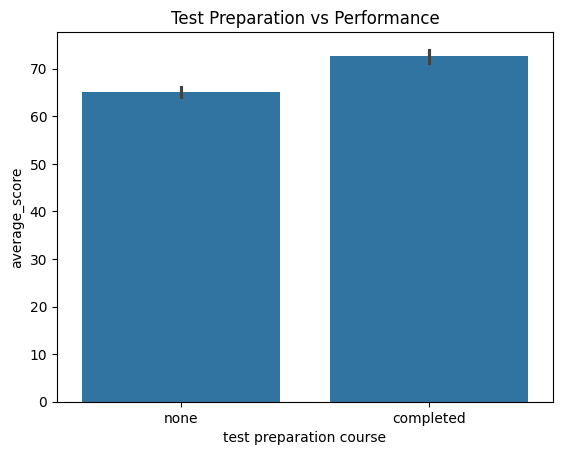

In [21]:
sns.barplot(x="test preparation course", y="average_score", data=df)
plt.title("Test Preparation vs Performance")
plt.show()

## Interpretation
- Students who completed test preparation scored higher.
- Preparation has a strong positive impact.

## Subject Correlation

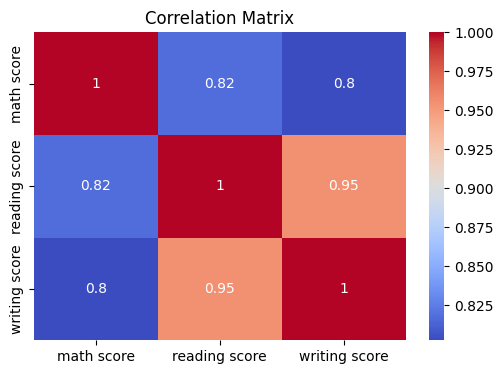

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["math score","reading score","writing score"]].corr(), 
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Interpretation
- Reading & Writing have very high correlation (~0.95).
- Math moderately correlated with reading & writing.
- Students good in one subject tend to perform well in others.

## Statistical Analysis

### Gender Difference

In [23]:
from scipy.stats import ttest_ind

male = df[df["gender"]=="male"]["average_score"]
female = df[df["gender"]=="female"]["average_score"]

ttest_ind(male, female)

TtestResult(statistic=np.float64(-4.169913529142), pvalue=np.float64(3.31197363824367e-05), df=np.float64(998.0))

## Interpretation
- If p-value < 0.05 → Parental education significantly affects performance.

## Key Findings
- Academic performance is influenced by parental education level.
- Socioeconomic status (lunch type) impacts student scores.
- Test preparation significantly improves performance.
- Female students perform better in reading and writing.
- Strong correlation exists between reading and writing scores.

## Conclusion
**The analysis reveals that student academic performance is strongly associated with socioeconomic and parental factors. Test preparation programs significantly enhance outcomes, and subject performances are positively correlated. These findings suggest that educational policies should focus on providing academic support to economically disadvantaged students and promoting structured preparation programs.**